In [1]:
from sklearn import linear_model

In [2]:
import seaborn as sns

In [3]:
import numpy as np

In [4]:
import pandas as pd

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
from sklearn.ensemble import RandomForestRegressor

In [7]:
from sklearn import metrics

In [8]:
import matplotlib.pyplot as plt

In [9]:
gold = pd.read_csv(r'E:\usa datasets\gld_price_data.csv') 

In [10]:
gold.head(5)

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [11]:
gold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [12]:
gold.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [13]:
correlation = gold.corr()

<AxesSubplot:>

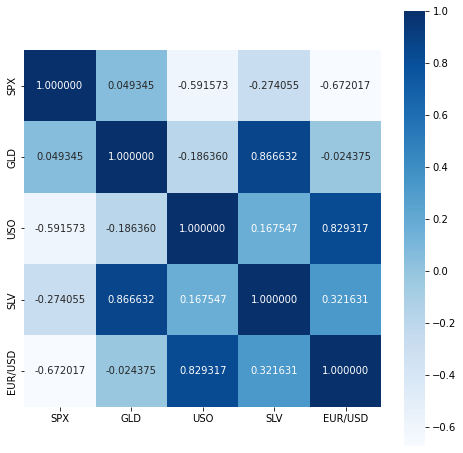

In [32]:
plt.figure(figsize = (8,8))
sns.heatmap(correlation,cbar=True,square=True,fmt='1f',annot=True,annot_kws={'size':10},cmap='Blues')
 

In [15]:
#print(correlation['GLD'])

C:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

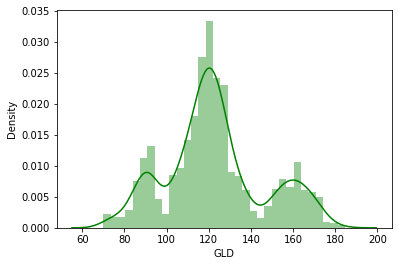

In [16]:
sns.distplot(gold['GLD'],color='green')

In [17]:
X = gold.drop(['Date','GLD'],axis=1)

In [18]:
Y = gold['GLD']

In [19]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [20]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [21]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state = 2)

In [22]:
regressor =  RandomForestRegressor(n_estimators=100)

In [23]:
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [24]:
test_data_predication = regressor.predict(X_test)

In [25]:
print(test_data_predication)

[168.87179977  82.00499986 115.94159998 127.55290076 120.70200126
 154.76069734 150.29999906 126.10200056 117.47949865 126.0667006
 116.80540108 171.18390089 141.28899893 167.82149798 115.18830019
 117.51250038 139.51760283 170.36020131 159.66160373 159.90069938
 154.86959983 125.16120016 176.48759975 157.2522043  125.24110036
  93.80169952  76.85810017 120.47159983 118.99629873 167.48680019
  88.1522007  125.0135998   90.96910048 117.71240048 121.12749907
 136.82770085 115.51810137 114.99650079 148.73609999 107.38910122
 104.38850245  87.04039812 126.5963005  117.97949989 153.34939897
 119.58610003 108.36499993 108.16279837  93.22190041 127.12609754
  74.45870055 113.71349945 121.02569987 111.41059934 118.81059883
 121.15669924 159.00730018 167.35260115 147.28979656  86.14199896
  94.47620039  86.86279866  90.48770055 119.03260079 126.37470097
 127.40729974 168.60719909 122.31229954 117.40439914  98.37780006
 168.24400076 143.23229834 132.01740171 121.19960222 121.18639951
 119.705600

In [26]:
error_score = metrics.r2_score(Y_test,test_data_predication)

In [27]:
print("R square errors is",error_score)

R square errors is 0.9892214123411408


In [28]:
Y_test =list(Y_test)

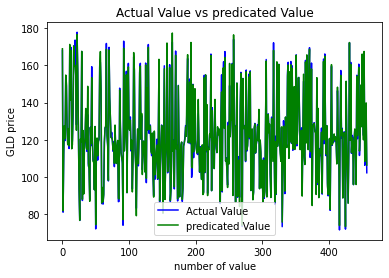

In [29]:
plt.plot(Y_test,color = 'blue',label = 'Actual Value')
plt.plot(test_data_predication,color = 'green',label = 'predicated Value')
plt.title('Actual Value vs predicated Value')
plt.xlabel('number of value')
plt.ylabel('GLD price')
plt.legend()
plt.show()